## Test 1. My first data science project

### In this lab you will apply the concepts and techniques developed in previous sessions. You are expected to work on the assignments on your own DURING the duration of the lab.

### You are expected to submit the code developed as well as a brief description of your findings and insights.

### This lab represents 30% of the total marking of the module¶

TO DO: Description of the challenge

### Let's load and install some libraries

In [1]:
!pip install py-openaq

In [2]:
import pandas as pd
import seaborn as sns
import openaq
import matplotlib as mpl
import matplotlib.pyplot as plt

### Let's load the dataset

In [3]:
airQualityCities=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458_OLD/master/data/airQualityCities.csv')

In [4]:
airQualityCities.sample(5)

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
307,2021-10-12 09:00:00,FR04031,no2,54.5,b'\xc2\xb5g/m\xc2\xb3',FR,Paris,2021-10-12 07:00:00+00:00,48.868866,2.311940
20009,2021-09-30 15:15:00,"Dr. Karni Singh Shooting Range, Delhi - DPCC",no2,29.8,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-30 09:45:00+00:00,28.498571,77.264840
9144,2021-10-06 14:00:00,FR04004,o3,68.7,b'\xc2\xb5g/m\xc2\xb3',FR,Paris,2021-10-06 12:00:00+00:00,48.891670,2.346669
32859,2021-09-29 06:30:00,"Major Dhyan Chand National Stadium, Delhi - DPCC",so2,4.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 01:00:00+00:00,28.611281,77.237738
31909,2021-09-29 08:30:00,"IGI Airport (T3), Delhi - IMD",co,1700.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 03:00:00+00:00,28.562776,77.118005


In [5]:
airQualityCities.head()

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
0,2021-10-12 23:00:00,US Diplomatic Post: New Delhi,pm25,-999.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-10-12 17:30:00+00:00,28.635760,77.224450
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766


In [6]:
airQualityCities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37087 entries, 0 to 37086
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date.local             37087 non-null  object 
 1   location               37087 non-null  object 
 2   parameter              37087 non-null  object 
 3   value                  37087 non-null  float64
 4   unit                   37087 non-null  object 
 5   country                37087 non-null  object 
 6   city                   37087 non-null  object 
 7   date.utc               37087 non-null  object 
 8   coordinates.latitude   37087 non-null  float64
 9   coordinates.longitude  37087 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.8+ MB


In [7]:
airQualityCities.groupby('city').count()

,date.local,location,parameter,value,unit,country,date.utc,coordinates.latitude,coordinates.longitude
city,,,,,,,,,
Beijing,300,300,300,300,300,300,300,300,300
Berlin,2248,2248,2248,2248,2248,2248,2248,2248,2248
Delhi,16265,16265,16265,16265,16265,16265,16265,16265,16265
London,5772,5772,5772,5772,5772,5772,5772,5772,5772
Madrid,7400,7400,7400,7400,7400,7400,7400,7400,7400
Paris,5102,5102,5102,5102,5102,5102,5102,5102,5102


In [8]:
airQualityCities.groupby('parameter').count()

,date.local,location,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
parameter,,,,,,,,,
co,3248,3248,3248,3248,3248,3248,3248,3248,3248
no2,10417,10417,10417,10417,10417,10417,10417,10417,10417
o3,7401,7401,7401,7401,7401,7401,7401,7401,7401
pm10,7206,7206,7206,7206,7206,7206,7206,7206,7206
pm25,5783,5783,5783,5783,5783,5783,5783,5783,5783
so2,3032,3032,3032,3032,3032,3032,3032,3032,3032


## Question 1. Find cities with levels of O3 larger than 120 µg/m³ 

In [9]:
airQualityCities.sample(3)

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
26840,2021-09-29 22:30:00,"Mandir Marg, Delhi - DPCC",so2,10.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 17:00:00+00:00,28.636429,77.201067
32005,2021-09-29 08:15:00,"Vivek Vihar, Delhi - DPCC",pm25,38.0,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 02:45:00+00:00,28.672342,77.315260
10384,2021-10-05 13:00:00,London Harlington,pm25,3.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-05 12:00:00+00:00,51.488790,-0.441614


In [10]:
O3Filter=airQualityCities['parameter']=='o3'
ValueLarger120=airQualityCities['value']>=120

In [11]:
airQualityCities[O3Filter&ValueLarger120]

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
7833,2021-10-07 18:00:00,ES1810A,o3,120.00,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-10-07 16:00:00+00:00,40.251940,-4.274720
26683,2021-09-29 22:45:00,"Jahangirpuri, Delhi - DPCC",o3,162.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 17:15:00+00:00,28.732820,77.170633
26822,2021-09-29 19:00:00,ES1810A,o3,120.00,b'\xc2\xb5g/m\xc2\xb3',ES,Madrid,2021-09-29 17:00:00+00:00,40.251940,-4.274720
27279,2021-09-29 21:15:00,"Ashok Vihar, Delhi - DPCC",o3,125.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 15:45:00+00:00,28.695381,77.181665
28675,2021-09-29 17:45:00,"DTU, Delhi - CPCB",o3,263.70,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 12:15:00+00:00,28.750050,77.111261
28868,2021-09-29 17:15:00,"DTU, Delhi - CPCB",o3,147.20,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 11:45:00+00:00,28.750050,77.111261
29656,2021-09-29 15:15:00,"Aya Nagar, Delhi - IMD",o3,272.67,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:45:00+00:00,28.470691,77.109936
29718,2021-09-29 14:45:00,"Chandni Chowk, Delhi - IITM",o3,295.15,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.656756,77.227234
29733,2021-09-29 14:45:00,"Aya Nagar, Delhi - IMD",o3,278.88,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 09:15:00+00:00,28.470691,77.109936
30080,2021-09-29 13:45:00,"IHBAS, Dilshad Garden, Delhi - CPCB",o3,148.23,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-29 08:15:00+00:00,28.681174,77.302523


## Question 2. Which city has the cleanest air ?
### Tip: consider adapting the following example: https://seaborn.pydata.org/examples/grouped_boxplot.html

(0.0, 1000.0)

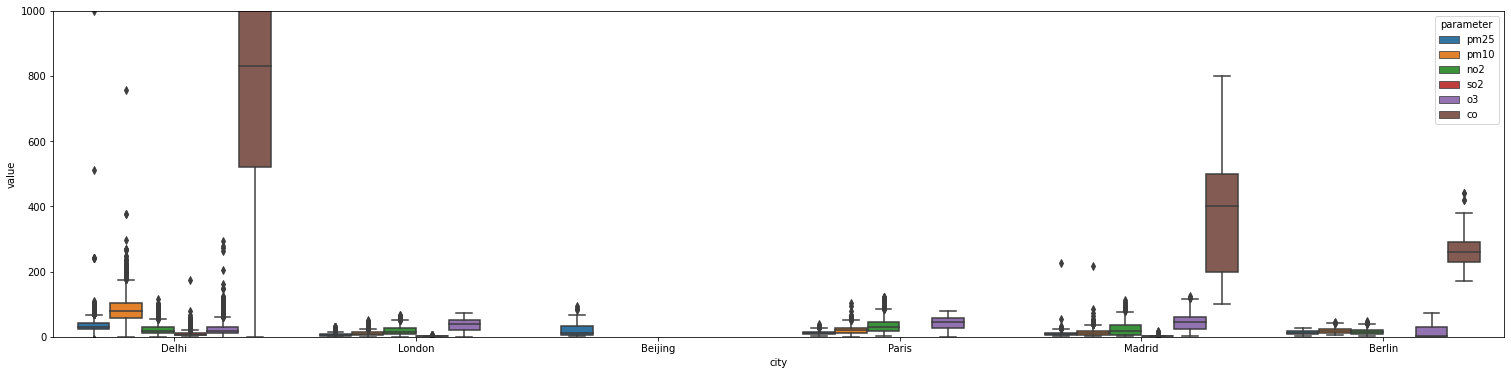

In [12]:
plt.figure(figsize=(26, 6))

ax = sns.boxplot(x='city', y='value', data=airQualityCities,hue='parameter')
ax.set_ylim([0, 1000])

In [13]:
airQualityCities

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
0,2021-10-12 23:00:00,US Diplomatic Post: New Delhi,pm25,-999.00,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-10-12 17:30:00+00:00,28.635760,77.224450
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.00,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
...,...,...,...,...,...,...,...,...,...,...
37082,2021-09-28 20:15:00,"Sirifort, Delhi - CPCB",so2,6.10,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.550425,77.215938
37083,2021-09-28 20:15:00,"Lodhi Road, Delhi - IITM",co,1240.00,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.588333,77.221667
37084,2021-09-28 20:15:00,"IGI Airport (T3), Delhi - IMD",no2,11.15,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.562776,77.118005
37085,2021-09-28 20:15:00,"Dr. Karni Singh Shooting Range, Delhi - DPCC",no2,67.10,b'\xc2\xb5g/m\xc2\xb3',IN,Delhi,2021-09-28 14:45:00+00:00,28.498571,77.264840


## Question 3. Which location is the most poluted in London ?

In [14]:
London=airQualityCities[airQualityCities['city']=='London']

In [15]:
London

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
5,2021-10-12 18:00:00,London Harlington,pm10,17.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614
...,...,...,...,...,...,...,...,...,...,...
36973,2021-09-28 16:00:00,London Haringey Priory Park South,no2,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.584128,-0.125254
36979,2021-09-28 16:00:00,London Haringey Priory Park South,o3,57.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.584128,-0.125254
36982,2021-09-28 16:00:00,London Eltham,pm10,7.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.452580,0.070766
36984,2021-09-28 16:00:00,Thurrock,no2,4.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-09-28 15:00:00+00:00,51.477070,0.317969


In [16]:
London.groupby(['location','parameter']).mean()

value  coordinates.latitude  \
location                          parameter                                    
London Eltham                     no2        13.364259             51.452580   
                                  o3         33.454789             51.452580   
                                  pm10       10.614747             51.452580   
                                  pm25        7.262673             51.452580   
London Haringey Priory Park South no2        17.434932             51.584128   
                                  o3         40.198813             51.584128   
London Harlington                 no2        20.729642             51.488790   
                                  o3         36.493151             51.488790   
                                  pm10       10.040956             51.488790   
                                  pm25        6.187713             51.488790   
Southend-on-Sea                   no2        15.294985             51.544206   
                                  o3         39.855030             51.544206   
                                  pm10       11.887906             51.544206   
                                  pm25        7.707965             51.544206   
Thurrock                          no2        20.865192             51.477070   
                                  o3         30.346313             51.477070   
                                  pm10       14.970501             51.477070   
                                  so2         1.596386             51.477070   
Tower Hamlets Roadside            no2        24.288514             51.522530   

                                             coordinates.longitude  
location                          parameter                         
London Eltham                     no2                     0.070766  
                                  o3                      0.070766  
                                  pm10                    0.070766  
                                  pm25                    0.070766  
London Haringey Priory Park South no2                    -0.125254  
                                  o3                     -0.125254  
London Harlington                 no2                    -0.441614  
                                  o3                     -0.441614  
                                  pm10                   -0.441614  
                                  pm25                   -0.441614  
Southend-on-Sea                   no2                     0.678408  
                                  o3                      0.678408  
                                  pm10                    0.678408  
                                  pm25                    0.678408  
Thurrock                          no2                     0.317969  
                                  o3                      0.317969  
                                  pm10                    0.317969  
                                  so2                     0.317969  
Tower Hamlets Roadside            no2                    -0.042155

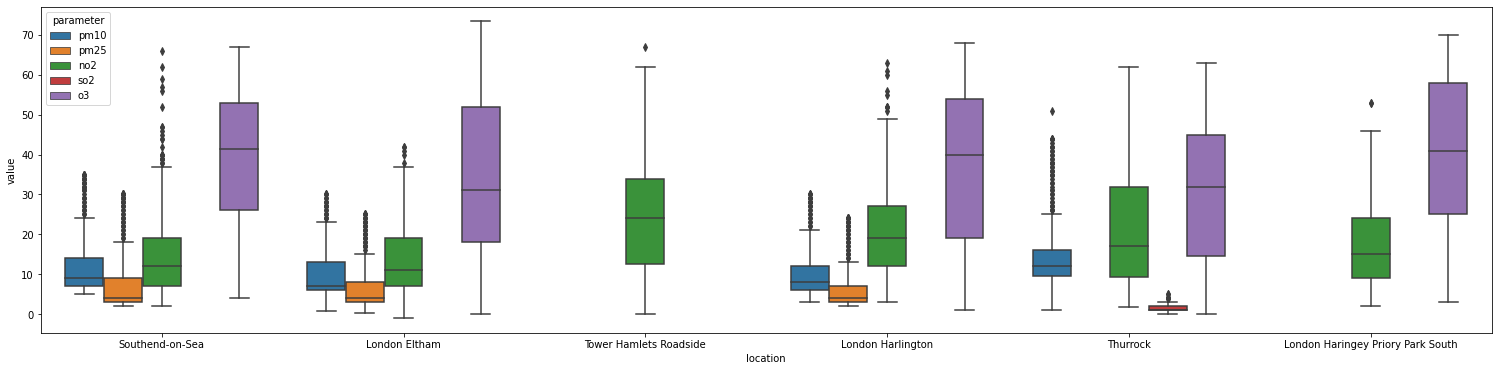

In [17]:
plt.figure(figsize=(26, 6))
ax = sns.boxplot(x='location', y='value', data=London,hue='parameter')

## Question 4. Plot the evolution of air polution accross time in locations in London
### Tip: Consider using Relplot: https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

In [18]:
London.head()

,date.local,location,parameter,value,unit,country,city,date.utc,coordinates.latitude,coordinates.longitude
1,2021-10-12 18:00:00,Southend-on-Sea,pm10,14.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.544206,0.678408
2,2021-10-12 18:00:00,London Eltham,pm25,8.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
3,2021-10-12 18:00:00,Tower Hamlets Roadside,no2,36.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.522530,-0.042155
4,2021-10-12 18:00:00,London Eltham,no2,15.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.452580,0.070766
5,2021-10-12 18:00:00,London Harlington,pm10,17.0,b'\xc2\xb5g/m\xc2\xb3',GB,London,2021-10-12 17:00:00+00:00,51.488790,-0.441614


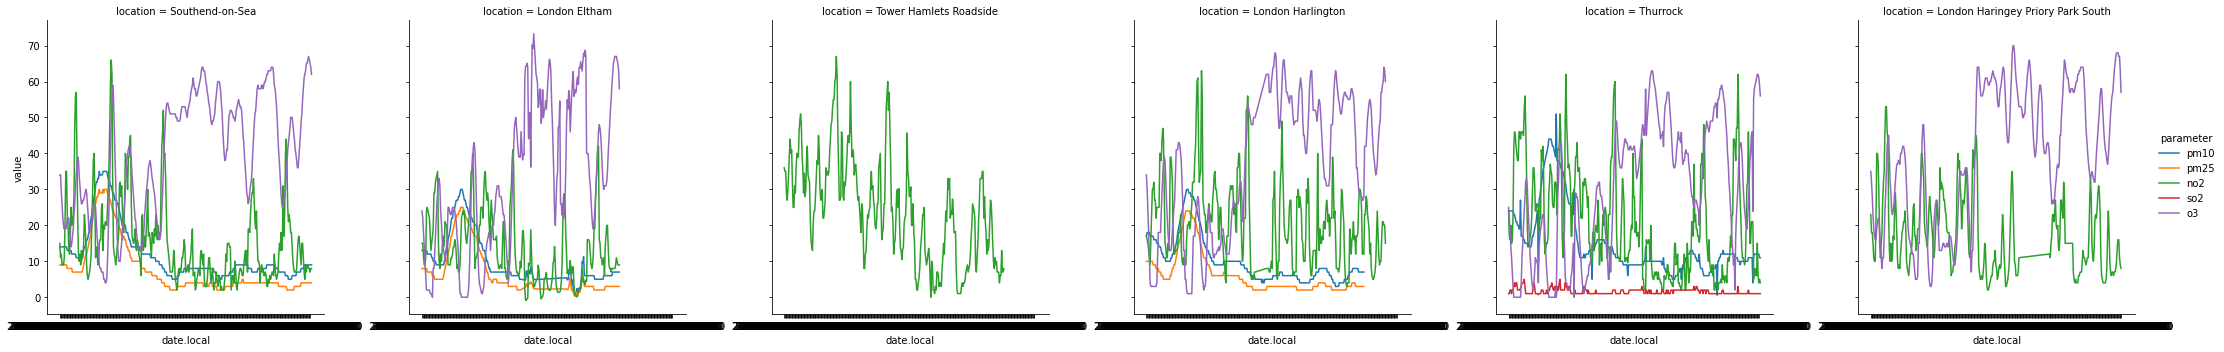

In [19]:
sns.relplot(x="date.local", y="value", hue="parameter",
            col="location", data=London,kind="line");

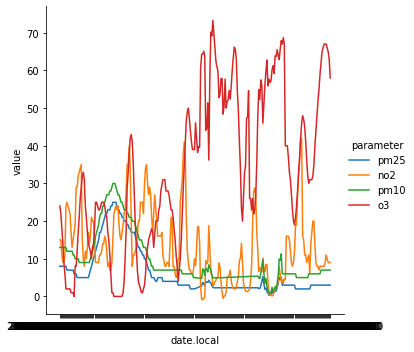

In [20]:
sns.relplot(x="date.local", y="value", hue="parameter",
             data=London[London['location']=='London Eltham'],kind="line");

## Question 5: Is there any relationship between levels of PM25 and PM10 in London?

In [27]:
### response: they are strongly correlated